<a href="https://colab.research.google.com/github/rajesh991986/Ik/blob/main/Starter_Code_Loan_Approval_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

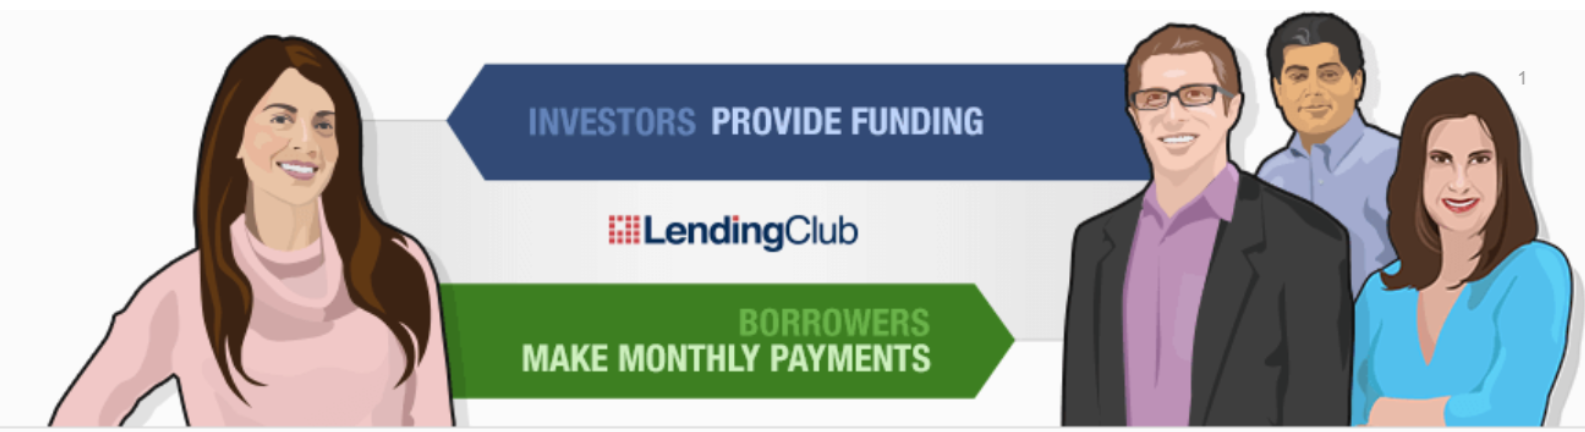

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [1]:
!pip install imbalanced-learn
!pip install xgboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... one
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.6.0-py3-none-linux_x86_64.whl size=2737783 sha256=f37390d63a01168a2920fe00f23e90f916daea5670ef0cc7df399fa325fb7af4
  Stored in directory: /home/ec2-user/.cache/pip/wheels/bb/db/6d/7814aed03437129dc284a055c084f201b765deb54b6908efab
Successfully built lightgbm


In [7]:
# Standard libraries
import time
import numpy as np
import pandas as pd
from datetime import timedelta
from scipy.stats import randint, uniform

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Scikit-learn model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Scikit-learn pipeline
from sklearn.pipeline import Pipeline

# Scikit-learn metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, precision_recall_curve, auc, make_scorer, fbeta_score
)

# Imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# XGBoost
import xgboost as xgb

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV, train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, 
                            recall_score, f1_score, precision_recall_curve, 
                            confusion_matrix, roc_curve, auc)
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import average_precision_score


In [3]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [13]:
## Load the dataset
## test
# Load the dataset
#loans_df = pd.read_csv('/content/sample_data/loans.csv')
loans_df = pd.read_csv('IK/loans.csv')
# Get a 1% sample with consistent random state for reproducibility
#sample_size = 0.01  # 1% of the data
test_size_percent=.2
#loans_df = loans_df.sample(frac=sample_size, random_state=42)
# Display the first few rows to get a sense of the data
loans_df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599.0,5000.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7%,9.0,171.62,Fully Paid
1,1077430,1314167.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4%,4.0,119.66,Charged Off
2,1077175,1313524.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5%,10.0,649.91,Fully Paid
3,1076863,1277178.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598.0,21%,37.0,357.48,Fully Paid
4,1075269,1311441.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3%,12.0,161.03,Fully Paid


In [61]:
## Observe the first few rows
## Do you observe any issues?
# Check the shape of the dataset
print(f"Dataset shape: {loans_df.shape}")

# Display the first few rows
loans_df.head()

# Check for issues:
# 1. Check for missing values
missing_values = loans_df.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0])

# 2. Check data types
print("\nData types:")
print(loans_df.dtypes)

# 3. Check for duplicate rows
print(f"\nNumber of duplicate rows: {loans_df.duplicated().sum()}")



Dataset shape: (38770, 23)

Missing values per column:
emp_length    1036
revol_util      50
dtype: int64

Data types:
id                       int64
member_id              float64
loan_amnt              float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util              object
total_acc              float64
last_pymnt_amnt        float64
loan_status             object
dtype: object

Number of duplicate rows: 0


Columns with missing values (%):
emp_length    2.672169
revol_util    0.128966
dtype: float64


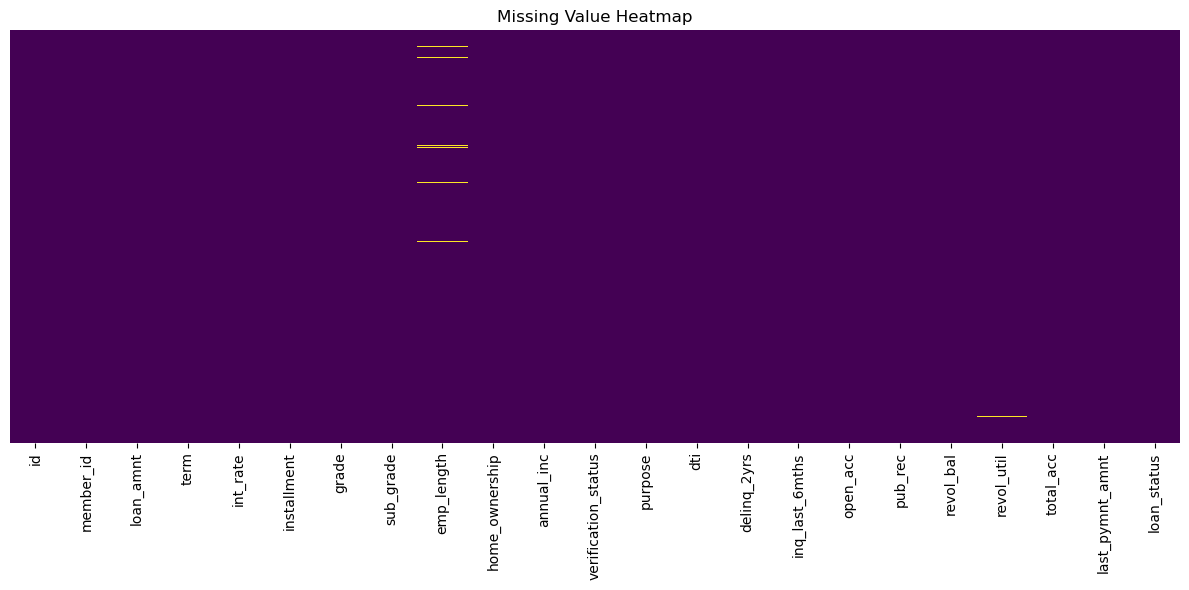

In [62]:
## Check the dataframe structure - datatypes and number of non-null rows
# Calculate percentage of missing values per column
missing_percentage = (loans_df.isnull().sum() / len(loans_df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Display columns with missing values and their percentages
print("Columns with missing values (%):")
print(missing_percentage)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(loans_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# For columns with missing values, examine the distribution
for col in missing_percentage.index:
    if loans_df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.histplot(loans_df[col].dropna())
        plt.title(f'Distribution of {col} (non-missing values)')
        plt.show()


#### Observations

- Document your observations

### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

Based on the bivariate analysis results, here are the key insights about the relationships between various factors and loan default:

## Grade vs Loan Status

- There's a strong relationship between loan grade and default rate, with default rates increasing as grade quality decreases:
  - Grade G has the highest default rate (33.55%)
  - Grade F shows 32.26% default rate
  - Grade E shows 26.53% default rate
  - Grade D shows 21.89% default rate
  - Grade C shows 17.10% default rate
  - Grade B shows 12.17% default rate
  - Grade A has the lowest default rate (5.99%)
- This confirms that the lending platform's grading system effectively captures default risk.

## Term vs Loan Status

- Loan term length significantly impacts default rates:
  - 60-month loans have a much higher default rate (24.88%)
  - 36-month loans have a lower default rate (11.09%)
- This indicates that longer loan terms more than double the risk of default, likely due to greater uncertainty over longer time horizons.

## Purpose vs Loan Status

- Loan purpose is a meaningful predictor of default risk:
  - Small business loans have the highest default rate (28.65%)
  - Renewable energy loans (18.63%) and educational loans (16.31%) also show high default rates
  - Debt consolidation loans, despite being the most common, have a moderate default rate (15.28%)
  - Wedding loans (10.32%) and major purchases (10.27%) have the lowest default rates

## Loan Amount vs Loan Status

- The boxplot shows charged-off loans tend to have slightly higher loan amounts than fully paid loans
- This suggests larger loans may carry somewhat higher default risk

## Annual Income vs Loan Status

- Borrowers who defaulted have lower median annual incomes (around $53,000) compared to those who fully paid (around $60,000)
- The interquartile range is also lower for defaulted loans, indicating income is a relevant factor in loan repayment ability

## Interest Rate vs Loan Status

- There's a clear relationship between interest rate and default:
  - Charged-off loans have a significantly higher mean interest rate (13.82%) compared to fully paid loans (11.63%)
  - The boxplot shows a clear upward shift in interest rates for defaulted loans
- This suggests higher interest rates may contribute to default risk or that riskier borrowers are correctly assigned higher rates

## Correlation Analysis

The correlation matrix reveals several important relationships:
- Strong positive correlation (0.69) between total accounts and open accounts
- Moderate positive correlation (0.47) between interest rate and revolving utilization
- Moderate positive correlation (0.43) between annual income and loan amount
- Moderate positive correlation (0.43) between annual income and revolving balance
- Moderate positive correlation (0.41) between revolving balance and revolving utilization

These findings provide valuable insights for developing a predictive model for loan default risk, with loan grade, term length, purpose, interest rate, and income emerging as particularly important factors.


#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

In [10]:
# 1. Improved feature engineering
def create_enhanced_features(df):
    print("Applying feature engineering...")
    start_time = time.time()
    
    # Make a copy to avoid modifying the original dataframe
    df = df.copy()
    
    # Convert revol_util from string to float if it's not already
    if df['revol_util'].dtype == 'object':
        df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)
    
    # Create interaction terms
    df['dti_loan_ratio'] = df['dti'] * df['loan_amnt'] / df['annual_inc']
    df['util_income_ratio'] = df['revol_util'] / df['annual_inc'] * 10000
    
    # Risk buckets
    df['income_bucket'] = pd.qcut(df['annual_inc'], 5, labels=False)
    df['dti_bucket'] = pd.qcut(df['dti'].clip(0, 100), 5, labels=False)
    
    # Temporal features if available
    if 'emp_length' in df.columns:
        df['emp_length_numeric'] = df['emp_length'].str.extract('(\d+)').fillna(0).astype(int)
        df['emp_length_risk'] = 5 - df['emp_length_numeric'].clip(0, 5)
    
    elapsed_time = time.time() - start_time
    print(f"Feature engineering completed in {timedelta(seconds=elapsed_time)}")
    print(f"Created {len(df.columns) - len(df.columns)} new features")
    
    return df

# 2. Improved class imbalance handling
def handle_imbalance(X_train, y_train):
    print("\nHandling class imbalance...")
    print(f"Original class distribution: {pd.Series(y_train).value_counts(normalize=True).mul(100).round(2)}")
    
    start_time = time.time()
    
    # First, handle missing values
    print("Imputing missing values...")
    imputer = SimpleImputer(strategy='mean')
    
    # Apply imputation
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), 
                                  columns=X_train.columns)
    
    # Now apply SMOTETomek on the imputed data
    print("Applying SMOTETomek for class balancing...")
    smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
    X_balanced, y_balanced = smote_tomek.fit_resample(X_train_imputed, y_train)
    
    elapsed_time = time.time() - start_time
    print(f"Class balancing completed in {timedelta(seconds=elapsed_time)}")
    print(f"Balanced class distribution: {pd.Series(y_balanced).value_counts(normalize=True).mul(100).round(2)}")
    print(f"Original shape: {X_train.shape}, Balanced shape: {X_balanced.shape}")
    
    return X_balanced, y_balanced

# 3. Model training with hyperparameter tuning
def train_model_with_tuning(model_type, X_train, y_train):
    print(f"\nTraining {model_type.replace('_', ' ').title()} with hyperparameter tuning...")
    start_time = time.time()
    
    # Define model and parameters based on model type
    if model_type == 'logistic_regression':
        # Create the pipeline with imputation
        model = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('classifier', LogisticRegression(random_state=42))
        ])
        
        # Update parameter names to include 'classifier__'
        param_distributions = {
            'classifier__C': np.logspace(-4, 4, 20),
            'classifier__penalty': ['l2'],
            'classifier__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
            'classifier__max_iter': [2000, 3000, 5000],
            'classifier__class_weight': ['balanced', None]
        }

    elif model_type == 'decision_tree':
        model = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('classifier', DecisionTreeClassifier(random_state=42))
        ])
        param_distributions = {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 10, 20, 30, 40, 50],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4, 8],
            'classifier__class_weight': ['balanced', None],
            'classifier__ccp_alpha': [0.0, 0.001, 0.01, 0.1]
        }
    
    elif model_type == 'random_forest':
        model = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('classifier', RandomForestClassifier(random_state=42))
        ])
        param_distributions = {
            'classifier__n_estimators': [100, 200, 300, 500, 800],
            'classifier__max_depth': [None, 10, 20, 30, 40, 50],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['sqrt', 'log2', None],
            'classifier__bootstrap': [True, False],
            'classifier__class_weight': ['balanced', 'balanced_subsample', None]
        }
    
    elif model_type == 'xgboost':
        model = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('classifier', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
        ])
        param_distributions = {
            'classifier__n_estimators': [100, 200, 300, 500],
            'classifier__max_depth': [3, 5, 7, 9],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
            'classifier__subsample': [0.6, 0.8, 1.0],
            'classifier__colsample_bytree': [0.6, 0.8, 1.0],
            'classifier__scale_pos_weight': [1, 3, 5, 7],  # For imbalanced classes
            'classifier__reg_alpha': [0, 0.1, 1],  # L1 regularization
            'classifier__reg_lambda': [0, 1, 10],  # L2 regularization
            'classifier__min_child_weight': [1, 3, 5]
        }
    
    elif model_type == 'gradient_boosting':
        model = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('classifier', GradientBoostingClassifier(random_state=42))
        ])
        param_distributions = {
            'classifier__loss': ['log_loss', 'exponential'],  # Changed from 'deviance' to 'log_loss'
            'classifier__n_estimators': [100, 200, 300, 500],
            'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7, 9],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__subsample': [0.6, 0.8, 1.0],
            'classifier__validation_fraction': [0.1, 0.2]
        }
    
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    print(f"Performing RandomizedSearchCV with {len(param_distributions)} parameters...")
    # Beta > 1 gives more weight to recall
    # Beta < 1 gives more weight to precision
    f2_scorer = make_scorer(fbeta_score, beta=2)  # More weight to recall
    # Set up RandomizedSearchCV with recall as scoring metric
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=10,  # Reduced for faster execution
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=f2_scorer,  # Custom scorer
        n_jobs=-1,
        verbose=1,  # Increased verbosity
        random_state=42
    )
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    elapsed_time = time.time() - start_time
    print(f"\n{model_type.replace('_', ' ').title()} training completed in {timedelta(seconds=elapsed_time)}")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best cross-validation recall score: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_


# 4. Threshold optimization
def optimize_threshold(model, X_val, y_val):
    print("\nOptimizing classification threshold for balance between precision and recall...")
    start_time = time.time()
    
    # Handle missing values in validation data
    imputer = SimpleImputer(strategy='mean')
    X_val_imputed = pd.DataFrame(imputer.fit_transform(X_val), columns=X_val.columns)
    
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_val_imputed)[:, 1]
    
    # Try different thresholds with finer granularity
    thresholds = np.arange(0.1, 0.7, 0.02)
    results = []
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        # Calculate balanced score that weighs precision slightly higher than recall
        # Adjust the weights based on your business priorities
        balanced_score = (0.6 * prec) + (0.4 * rec)
        
        results.append({
            'threshold': threshold,
            'accuracy': acc,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'balanced_score': balanced_score
        })
        
        print(f"Threshold: {threshold:.2f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, Balanced: {balanced_score:.4f}")
    
    # Convert results to DataFrame for easier analysis
    results_df = pd.DataFrame(results)
    
    # Find threshold with best balanced score where both precision and recall are reasonable
    # You can adjust these minimum requirements based on your business needs
    valid_results = results_df[(results_df['precision'] >= 0.65) & (results_df['recall'] >= 0.45)]
    
    if len(valid_results) > 0:
        best_row = valid_results.loc[valid_results['balanced_score'].idxmax()]
        best_threshold = best_row['threshold']
        best_balanced = best_row['balanced_score']
        best_precision = best_row['precision']
        best_recall = best_row['recall']
    else:
        # If no threshold meets the criteria, choose the one with highest F1 score
        best_row = results_df.loc[results_df['f1'].idxmax()]
        best_threshold = best_row['threshold']
        best_balanced = best_row['balanced_score']
        best_precision = best_row['precision']
        best_recall = best_row['recall']
    
    elapsed_time = time.time() - start_time
    print(f"Threshold optimization completed in {timedelta(seconds=elapsed_time)}")
    print(f"Best threshold: {best_threshold:.2f} with Precision: {best_precision:.4f}, Recall: {best_recall:.4f}")
    
    # Plot threshold vs metrics
    plt.figure(figsize=(12, 8))
    for metric in ['precision', 'recall', 'f1', 'balanced_score']:
        plt.plot(results_df['threshold'], results_df[metric], marker='.', label=metric)
    
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best threshold: {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Classification Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_threshold


# 5. Model evaluation
def evaluate_model(model, threshold, X_test, y_test, model_name):
    print(f"\nEvaluating {model_name.replace('_', ' ').title()} with threshold {threshold:.2f}...")
    
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Apply threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate PR AUC
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"PR AUC Score: {pr_auc:.4f}")
    
    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name.replace("_", " ").title()}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'threshold': threshold,
        'confusion_matrix': cm
    }

def evaluate_precision_recall_balance(model, threshold, X_test, y_test):
    print("\nEvaluating precision-recall balance...")
    
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Apply threshold
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate custom balance metrics
    # Cost ratio: how much more costly is a false positive than a false negative?
    # For loans, approving a bad loan (false positive) is typically more costly
    cost_ratio = 3  # Adjust based on your business context
    
    # Calculate confusion matrix
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate costs
    false_positive_cost = fp * cost_ratio
    false_negative_cost = fn * 1
    total_cost = false_positive_cost + false_negative_cost
    
    print(f"Precision (correctly approved loans): {precision:.4f}")
    print(f"Recall (found good customers): {recall:.4f}")
    print(f"F1 Score (balance): {f1:.4f}")
    print(f"False Positives (bad loans approved): {fp}")
    print(f"False Negatives (good customers rejected): {fn}")
    print(f"Estimated cost ratio (FP:FN): {cost_ratio}:1")
    print(f"Total weighted cost: {total_cost}")
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'false_positives': fp,
        'false_negatives': fn,
        'total_cost': total_cost
    }

# 6. Plot precision-recall curve for a single model
def plot_precision_recall_curve_single(model, X_test, y_test, model_name):
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # Calculate PR AUC
    pr_auc = auc(recall, precision)
    
    # Plot the precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'{model_name.replace("_", " ").title()} (PR AUC = {pr_auc:.3f})')
    
    # Add a "no skill" line (baseline)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label=f'No Skill ({no_skill:.3f})')
    
    # Add labels and legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name.replace("_", " ").title()}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 7. Plot precision-recall curves for all models
def plot_precision_recall_curves_all(models_dict, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    # Add a "no skill" line (baseline)
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label=f'No Skill ({no_skill:.3f})')
    
    # Plot PR curve for each model
    for model_name, model_info in models_dict.items():
        model = model_info['model']
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = model_info['metrics']['pr_auc']
        plt.plot(recall, precision, marker='.', label=f'{model_name.replace("_", " ").title()} (PR AUC = {pr_auc:.3f})')
    
    # Add labels and legend
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for All Models')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_precision_recall_tradeoff(model, X_test, y_test):
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate precision and recall for different thresholds
    precisions = []
    recalls = []
    thresholds = np.arange(0.1, 0.9, 0.01)
    
    for threshold in thresholds:
        y_pred = (y_pred_proba >= threshold).astype(int)
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
    
    # Plot the precision-recall tradeoff
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, 'b-', label='Precision')
    plt.plot(thresholds, recalls, 'r-', label='Recall')
    
    # Find the intersection point
    intersection_idx = np.argmin(np.abs(np.array(precisions) - np.array(recalls)))
    intersection_threshold = thresholds[intersection_idx]
    intersection_value = (precisions[intersection_idx] + recalls[intersection_idx]) / 2
    
    plt.axvline(x=intersection_threshold, color='g', linestyle='--', 
                label=f'Intersection: {intersection_threshold:.2f}')
    
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Precision-Recall Tradeoff')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Intersection point: threshold={intersection_threshold:.2f}, value={intersection_value:.4f}")
    return intersection_threshold


# 8. Plot comparison bar charts
def plot_model_comparison_charts(models_dict):
    # Extract metrics for each model
    model_names = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []
    pr_auc_scores = []
    
    for model_name, model_info in models_dict.items():
        metrics = model_info['metrics']
        model_names.append(model_name.replace('_', ' ').title())
        accuracy_scores.append(metrics['accuracy'])
        precision_scores.append(metrics['precision'])
        recall_scores.append(metrics['recall'])
        f1_scores.append(metrics['f1'])
        roc_auc_scores.append(metrics['roc_auc'])
        pr_auc_scores.append(metrics['pr_auc'])
    
    # Create a DataFrame for easier plotting
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1 Score': f1_scores,
        'ROC AUC': roc_auc_scores,
        'PR AUC': pr_auc_scores
    })
    
    # Plot bar charts for each metric
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']
    
    # Plot all metrics in a single figure with subplots
    fig, axes = plt.subplots(3, 2, figsize=(15, 18))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics_to_plot):
        ax = axes[i]
        sns.barplot(x='Model', y=metric, data=metrics_df, ax=ax)
        ax.set_title(f'Model Comparison - {metric}')
        ax.set_ylim(0, 1)  # All metrics are between 0 and 1
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Add value labels on top of bars
        for j, v in enumerate(metrics_df[metric]):
            ax.text(j, v + 0.02, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Create a summary table
    print("\nModel Performance Summary:")
    print(metrics_df.set_index('Model').round(4))

# Main workflow to compare multiple models with progress tracking
# Main workflow function that coordinates all steps
def compare_models_with_progress(X, y):
    print("Starting model comparison workflow...")
    overall_start_time = time.time()
    
    # Split data with stratification
    print("\nSplitting data into train, validation, and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size_percent, random_state=42, stratify=y
    )
    
    # Further split training data to have a validation set for threshold optimization
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Validation set shape: {X_val.shape}")
    print(f"Test set shape: {X_test.shape}")
    
    # Handle class imbalance
    X_train_balanced, y_train_balanced = handle_imbalance(X_train, y_train)
    
    # Define models to train
    model_types = [
        'logistic_regression',
        'decision_tree',
        'random_forest',
        #'xgboost',
        'gradient_boosting'
    ]
    
    # Dictionary to store models and their metrics
    models_dict = {}
    
    # Train and evaluate each model
    for model_type in model_types:
        model_start_time = time.time()
        print(f"\n{'='*20} Training {model_type.replace('_', ' ').title()} {'='*20}")
        
        # Train model with hyperparameter tuning
        model = train_model_with_tuning(model_type, X_train_balanced, y_train_balanced)
        
        # Optimize threshold
        threshold = optimize_threshold(model, X_val, y_val)
        
        # Evaluate model
        metrics = evaluate_model(model, threshold, X_test, y_test, model_type)

        # Add this line to evaluate precision-recall balance
        precision_recall_metrics = evaluate_precision_recall_balance(model, threshold, X_test, y_test)
    
        # Plot precision-recall curve for this model
        plot_precision_recall_curve_single(model, X_test, y_test, model_type)
        
        # Store model and metrics
        models_dict[model_type] = {
            'model': model,
            'metrics': metrics,
            'precision_recall_balance': precision_recall_metrics,  # Store the new metrics
            'training_time': time.time() - model_start_time
        }
        
        # Print training time
        model_time = time.time() - model_start_time
        print(f"\n{model_type.replace('_', ' ').title()} completed in {timedelta(seconds=model_time)}")
    
    # Print overall time
    overall_time = time.time() - overall_start_time
    print(f"\nAll models trained and evaluated in {timedelta(seconds=overall_time)}")
    
    # Print summary of model performance
    print("\nModel Performance Summary:")
    summary_data = []
    for model_name, model_info in models_dict.items():
        metrics = model_info['metrics']
        summary_data.append({
            'Model': model_name.replace('_', ' ').title(),
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1 Score': metrics['f1'],
            'ROC AUC': metrics['roc_auc'],
            'PR AUC': metrics['pr_auc'],
            'Training Time': timedelta(seconds=model_info['training_time'])
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.set_index('Model').round(4))
    
    return models_dict, X_train, X_val, X_test, y_train, y_val, y_test

# Before training XGBoost models, clean column names
def clean_feature_names(X):
    # Replace invalid characters in column names
    X_clean = X.copy()
    X_clean.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in X.columns]
    return X_clean


In [11]:
# 1. Prepare your data
print("\n=== Data Preparation ===")
print(f"Original dataframe shape: {loans_df.shape}")

# Separate features and target variable
X = loans_df.drop('loan_status', axis=1)
y = (loans_df['loan_status'] == 'Charged Off').astype(int)  # Convert to binary

print(f"Target variable distribution:")
print(pd.Series(y).value_counts(normalize=True).mul(100).round(2))

# 2. Apply feature engineering
X = create_enhanced_features(X)
print(f"Dataframe shape after feature engineering: {X.shape}")

# 3. Convert categorical variables to numeric
print("\n=== Encoding Categorical Variables ===")
# Get categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}")

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(f"Dataframe shape after one-hot encoding: {X.shape}")



=== Data Preparation ===
Original dataframe shape: (38770, 23)
Target variable distribution:
0    85.47
1    14.53
Name: loan_status, dtype: float64
Applying feature engineering...
Feature engineering completed in 0:00:00.081982
Created 0 new features
Dataframe shape after feature engineering: (38770, 28)

=== Encoding Categorical Variables ===
Categorical columns to encode: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
Dataframe shape after one-hot encoding: (38770, 460)



=== Data Preparation ===
Original dataframe shape: (38770, 23)
Target variable distribution:
0    85.47
1    14.53
Name: loan_status, dtype: float64
Applying feature engineering...
Feature engineering completed in 0:00:00.290990
Created 0 new features
Dataframe shape after feature engineering: (38770, 28)

=== Encoding Categorical Variables ===
Categorical columns to encode: ['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']
Dataframe shape after one-hot encoding: (38770, 460)

=== Starting Model Comparison ===
This may take some time depending on your dataset size and computational resources...
Progress will be displayed for each step of the process
Starting model comparison workflow...

Splitting data into train, validation, and test sets...
Training set shape: (18609, 460)
Validation set shape: (4653, 460)
Test set shape: (15508, 460)

Handling class imbalance...
Original class distribution: 0    85.47
1    14.53
Name: loan_

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


Logistic Regression training completed in 1:24:40.463037
Best parameters: {'classifier__solver': 'sag', 'classifier__penalty': 'l2', 'classifier__max_iter': 5000, 'classifier__class_weight': 'balanced', 'classifier__C': 545.5594781168514}
Best cross-validation recall score: 0.8815

Optimizing classification threshold for balance between precision and recall...
Threshold: 0.10, Precision: 0.1978, Recall: 0.9926, F1: 0.3299, Balanced: 0.5157
Threshold: 0.12, Precision: 0.2026, Recall: 0.9926, F1: 0.3365, Balanced: 0.5186
Threshold: 0.14, Precision: 0.2060, Recall: 0.9926, F1: 0.3411, Balanced: 0.5206
Threshold: 0.16, Precision: 0.2083, Recall: 0.9926, F1: 0.3443, Balanced: 0.5220
Threshold: 0.18, Precision: 0.2109, Recall: 0.9926, F1: 0.3479, Balanced: 0.5236
Threshold: 0.20, Precision: 0.2138, Recall: 0.9926, F1: 0.3518, Balanced: 0.5253
Threshold: 0.22, Precision: 0.2166, Recall: 0.9926, F1: 0.3556, Balanced: 0.5270
Threshold: 0.24, Precision: 0.2192, Recall: 0.9926, F1: 0.3591, Balan

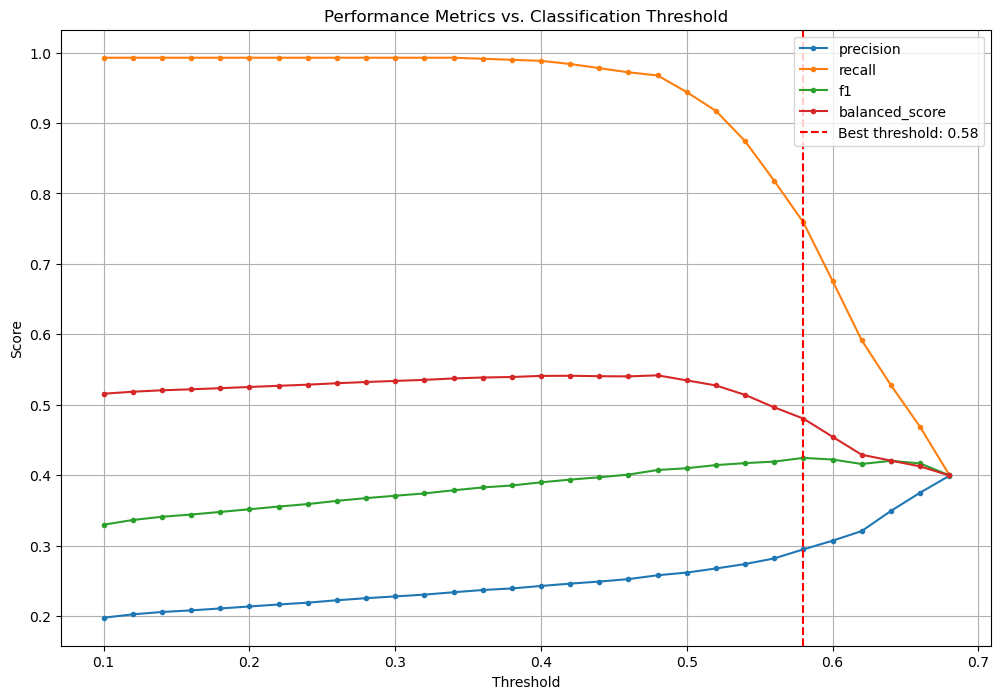


Evaluating Logistic Regression with threshold 0.58...
Accuracy: 0.7143
Precision: 0.3070
Recall: 0.7680
F1 Score: 0.4386
ROC AUC Score: 0.8252
PR AUC Score: 0.4248


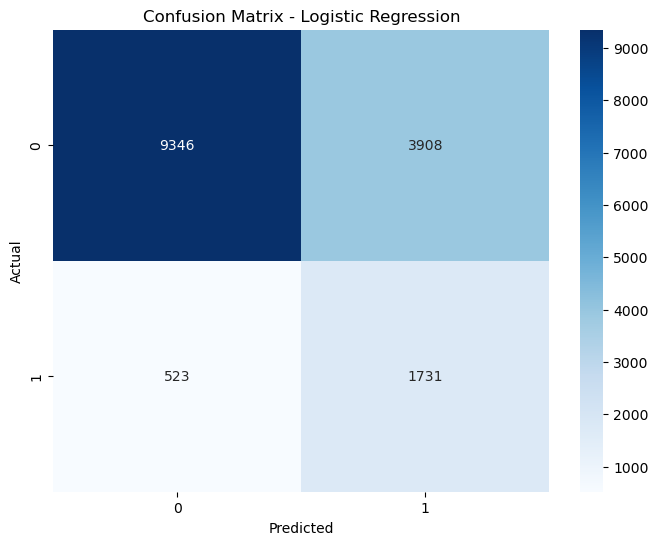


Evaluating precision-recall balance...
Precision (correctly approved loans): 0.3070
Recall (found good customers): 0.7680
F1 Score (balance): 0.4386
False Positives (bad loans approved): 3908
False Negatives (good customers rejected): 523
Estimated cost ratio (FP:FN): 3:1
Total weighted cost: 12247


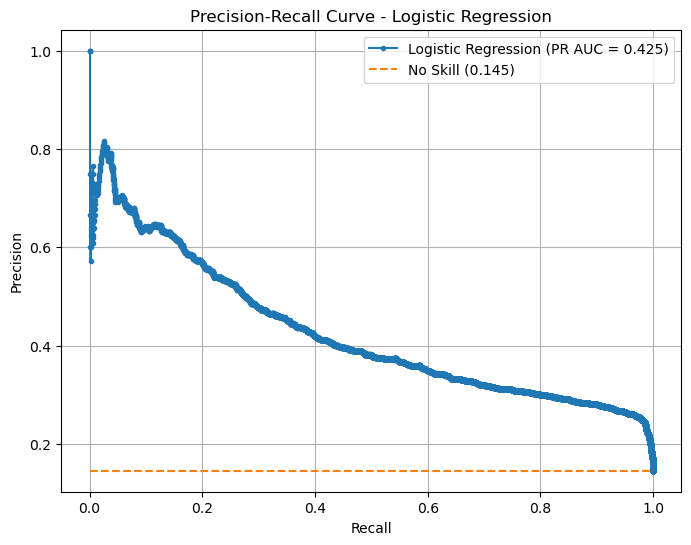


Logistic Regression completed in 1:24:41.703284

==================== Training Decision Tree ====================

Training Decision Tree with hyperparameter tuning...
Performing RandomizedSearchCV with 6 parameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Decision Tree training completed in 0:00:31.922636
Best parameters: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 40, 'classifier__criterion': 'entropy', 'classifier__class_weight': 'balanced', 'classifier__ccp_alpha': 0.0}
Best cross-validation recall score: 0.8910

Optimizing classification threshold for balance between precision and recall...
Threshold: 0.10, Precision: 0.3981, Recall: 0.4305, F1: 0.4136, Balanced: 0.4110
Threshold: 0.12, Precision: 0.3981, Recall: 0.4305, F1: 0.4136, Balanced: 0.4110
Threshold: 0.14, Precision: 0.3981, Recall: 0.4305, F1: 0.4136, Balanced: 0.4110
Threshold: 0.16, Precision: 0.3981, Recall: 0.4305, F1: 0.4136, Balanced: 0.

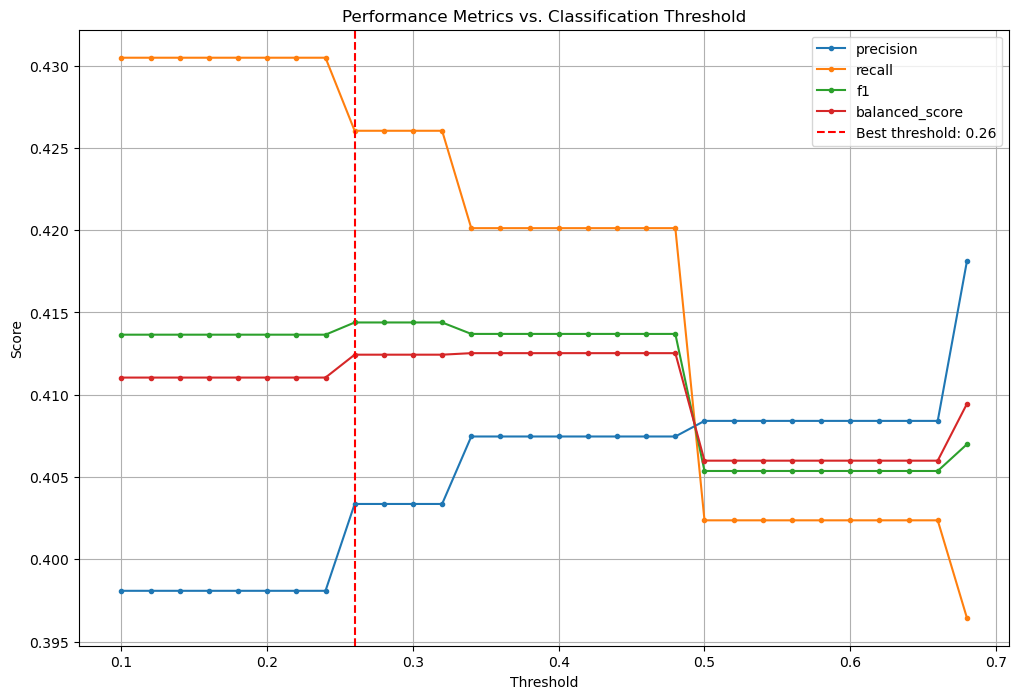


Evaluating Decision Tree with threshold 0.26...
Accuracy: 0.8240
Precision: 0.4040
Recall: 0.4432
F1 Score: 0.4227
ROC AUC Score: 0.6687
PR AUC Score: 0.4562


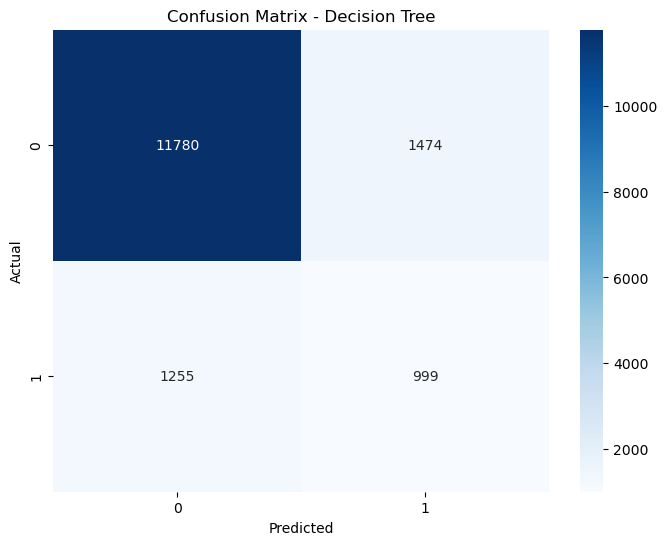


Evaluating precision-recall balance...
Precision (correctly approved loans): 0.4040
Recall (found good customers): 0.4432
F1 Score (balance): 0.4227
False Positives (bad loans approved): 1474
False Negatives (good customers rejected): 1255
Estimated cost ratio (FP:FN): 3:1
Total weighted cost: 5677


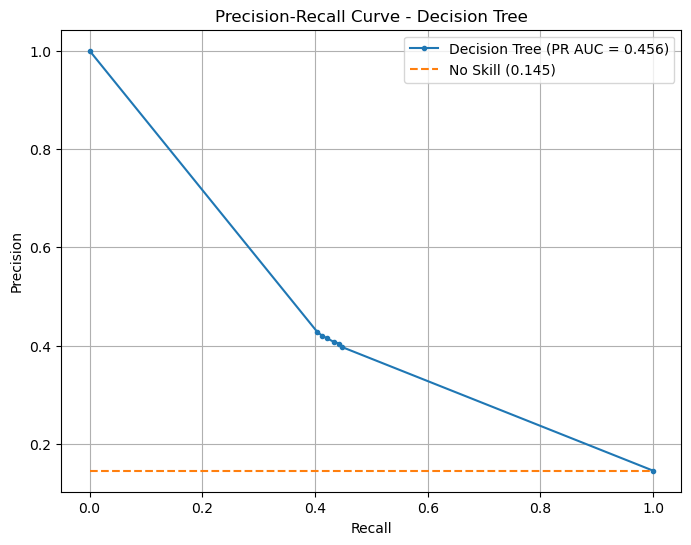


Decision Tree completed in 0:00:33.156961

==================== Training Random Forest ====================

Training Random Forest with hyperparameter tuning...
Performing RandomizedSearchCV with 7 parameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Random Forest training completed in 0:36:41.061073
Best parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 4, 'classifier__max_features': None, 'classifier__max_depth': None, 'classifier__class_weight': 'balanced', 'classifier__bootstrap': True}
Best cross-validation recall score: 0.8979

Optimizing classification threshold for balance between precision and recall...
Threshold: 0.10, Precision: 0.2744, Recall: 0.9320, F1: 0.4240, Balanced: 0.5374
Threshold: 0.12, Precision: 0.2892, Recall: 0.9053, F1: 0.4384, Balanced: 0.5357
Threshold: 0.14, Precision: 0.3026, Recall: 0.8728, F1: 0.4494, Balanced: 0.5307
Threshold: 0.16, Precision: 0.3147, Recall: 0.8

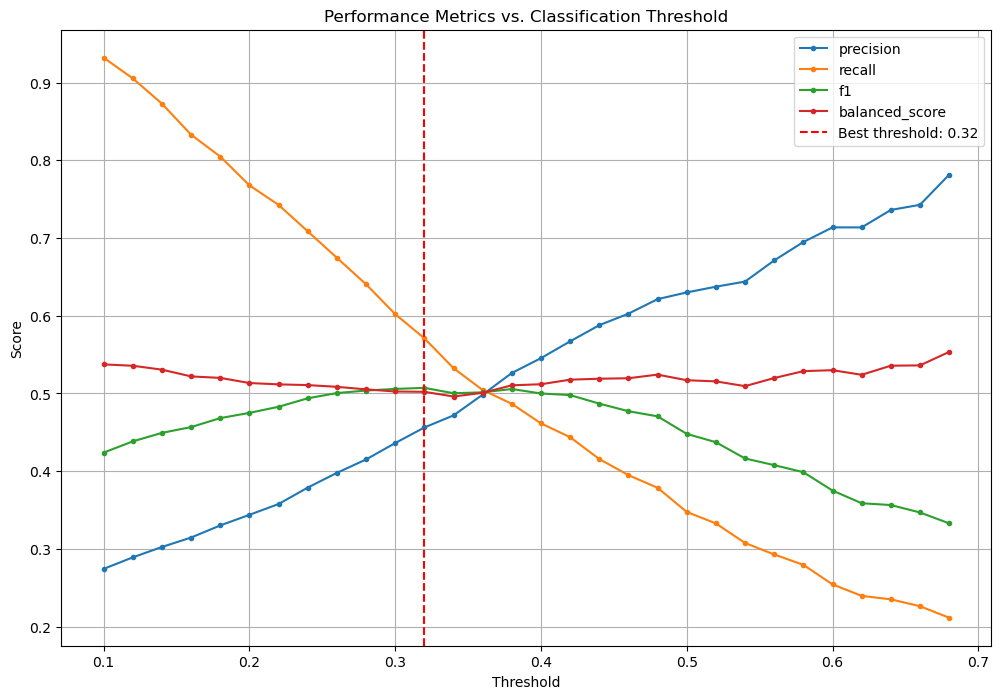


Evaluating Random Forest with threshold 0.32...
Accuracy: 0.8380
Precision: 0.4551
Recall: 0.5830
F1 Score: 0.5112
ROC AUC Score: 0.8657
PR AUC Score: 0.5672


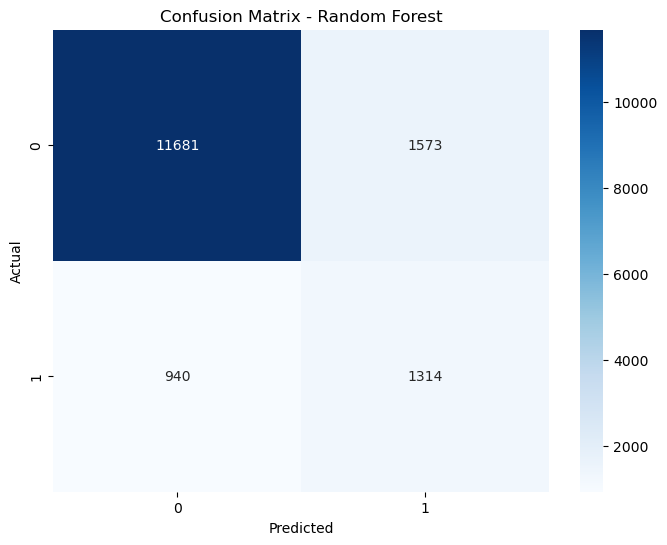


Evaluating precision-recall balance...
Precision (correctly approved loans): 0.4551
Recall (found good customers): 0.5830
F1 Score (balance): 0.5112
False Positives (bad loans approved): 1573
False Negatives (good customers rejected): 940
Estimated cost ratio (FP:FN): 3:1
Total weighted cost: 5659


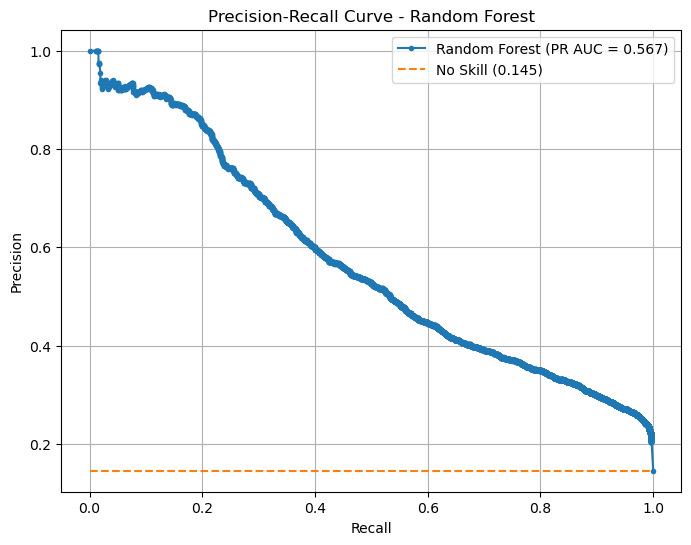


Random Forest completed in 0:36:43.048266

==================== Training Gradient Boosting ====================

Training Gradient Boosting with hyperparameter tuning...
Performing RandomizedSearchCV with 8 parameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Gradient Boosting training completed in 0:54:28.265405
Best parameters: {'classifier__validation_fraction': 0.1, 'classifier__subsample': 1.0, 'classifier__n_estimators': 500, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 7, 'classifier__loss': 'log_loss', 'classifier__learning_rate': 0.2}
Best cross-validation recall score: 0.9091

Optimizing classification threshold for balance between precision and recall...
Threshold: 0.10, Precision: 0.4559, Recall: 0.7796, F1: 0.5753, Balanced: 0.5854
Threshold: 0.12, Precision: 0.4723, Recall: 0.7574, F1: 0.5818, Balanced: 0.5864
Threshold: 0.14, Precision: 0.4891, Recall: 0.7278, F1: 0.5850, Balanced: 0.5846
Threshol

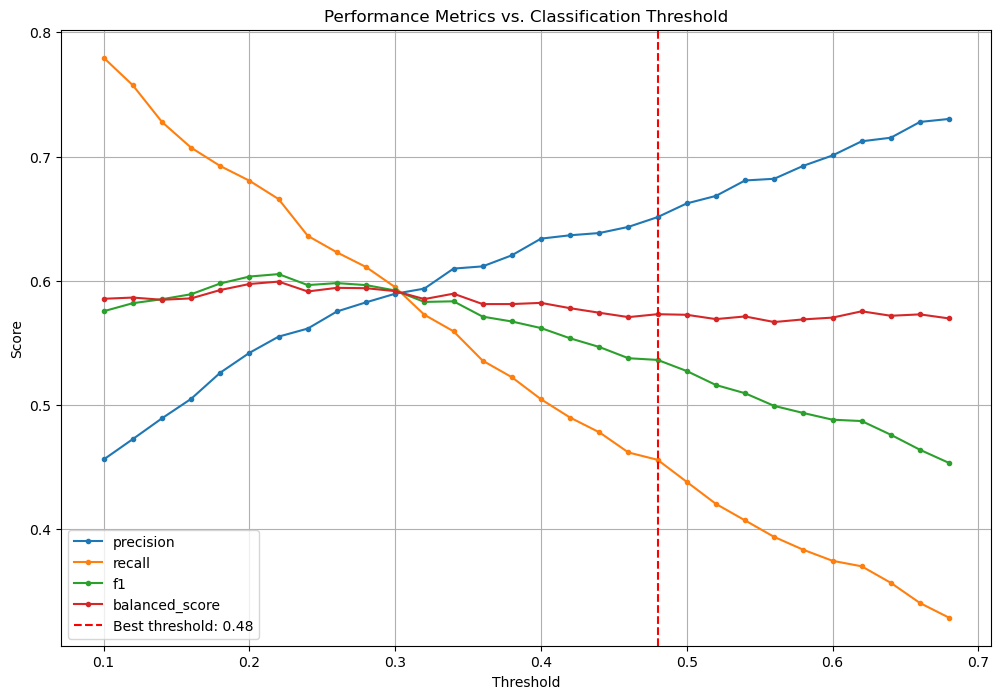


Evaluating Gradient Boosting with threshold 0.48...
Accuracy: 0.8863
Precision: 0.6690
Recall: 0.4312
F1 Score: 0.5244
ROC AUC Score: 0.8964
PR AUC Score: 0.6332


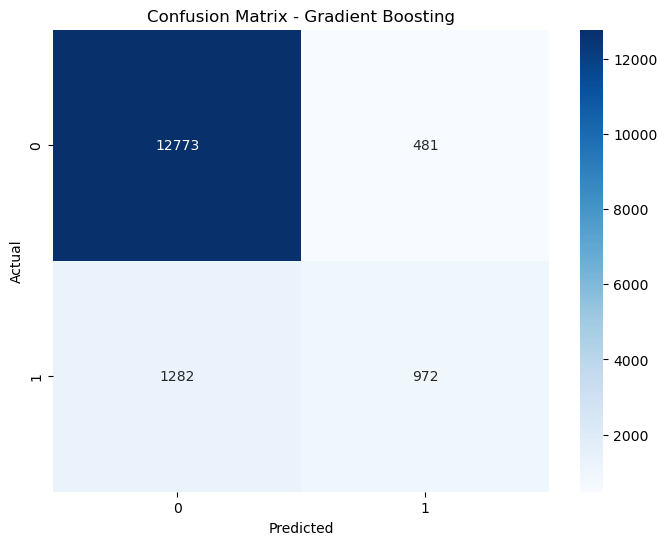


Evaluating precision-recall balance...
Precision (correctly approved loans): 0.6690
Recall (found good customers): 0.4312
F1 Score (balance): 0.5244
False Positives (bad loans approved): 481
False Negatives (good customers rejected): 1282
Estimated cost ratio (FP:FN): 3:1
Total weighted cost: 2725


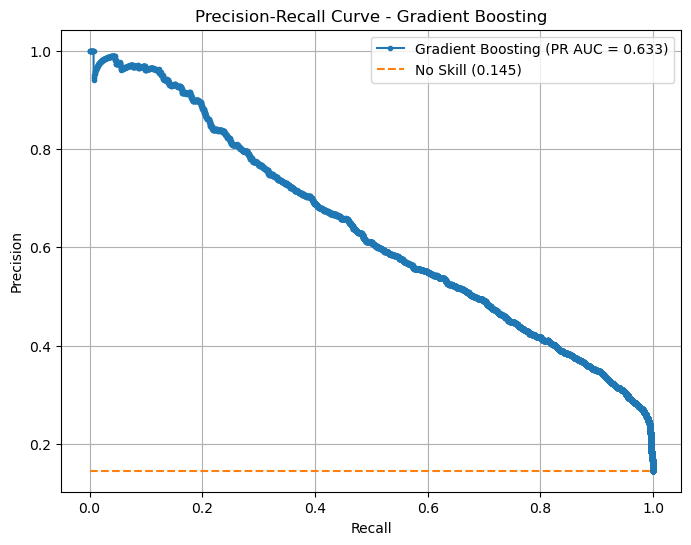


Gradient Boosting completed in 0:54:30.728215

All models trained and evaluated in 2:56:39.560148

Model Performance Summary:
                     Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC  \
Model                                                                         
Logistic Regression    0.7143     0.3070  0.7680    0.4386   0.8252  0.4248   
Decision Tree          0.8240     0.4040  0.4432    0.4227   0.6687  0.4562   
Random Forest          0.8380     0.4551  0.5830    0.5112   0.8657  0.5672   
Gradient Boosting      0.8863     0.6690  0.4312    0.5244   0.8964  0.6332   

                             Training Time  
Model                                       
Logistic Regression 0 days 01:24:41.703282  
Decision Tree       0 days 00:00:33.156950  
Random Forest       0 days 00:36:43.048264  
Gradient Boosting   0 days 00:54:30.728213  

Total model comparison time: 2:56:39.568232

=== Model Comparison Visualizations ===


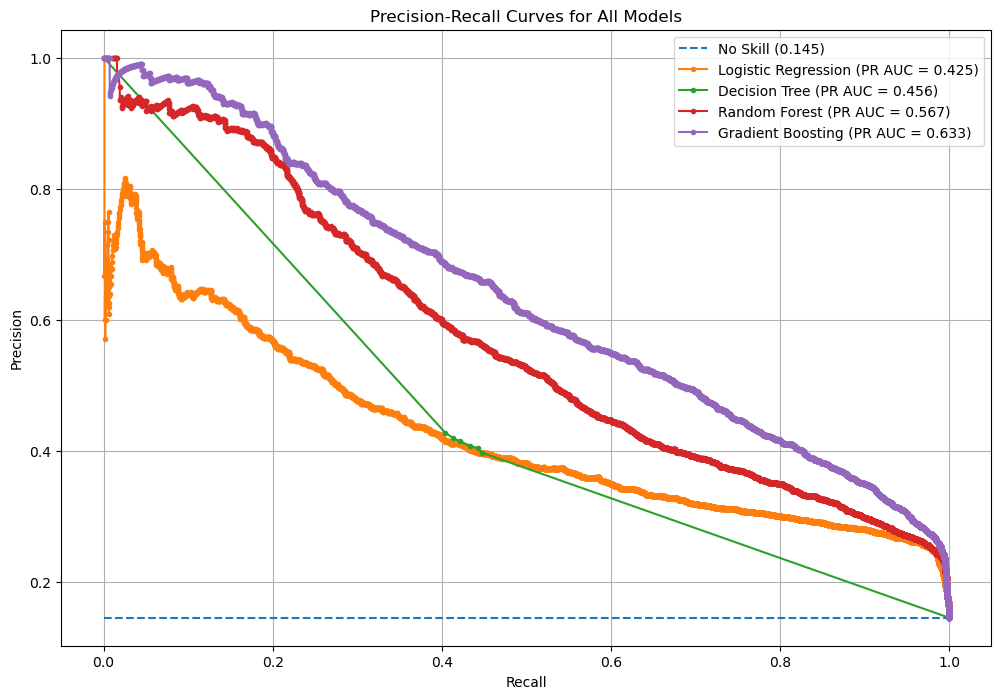

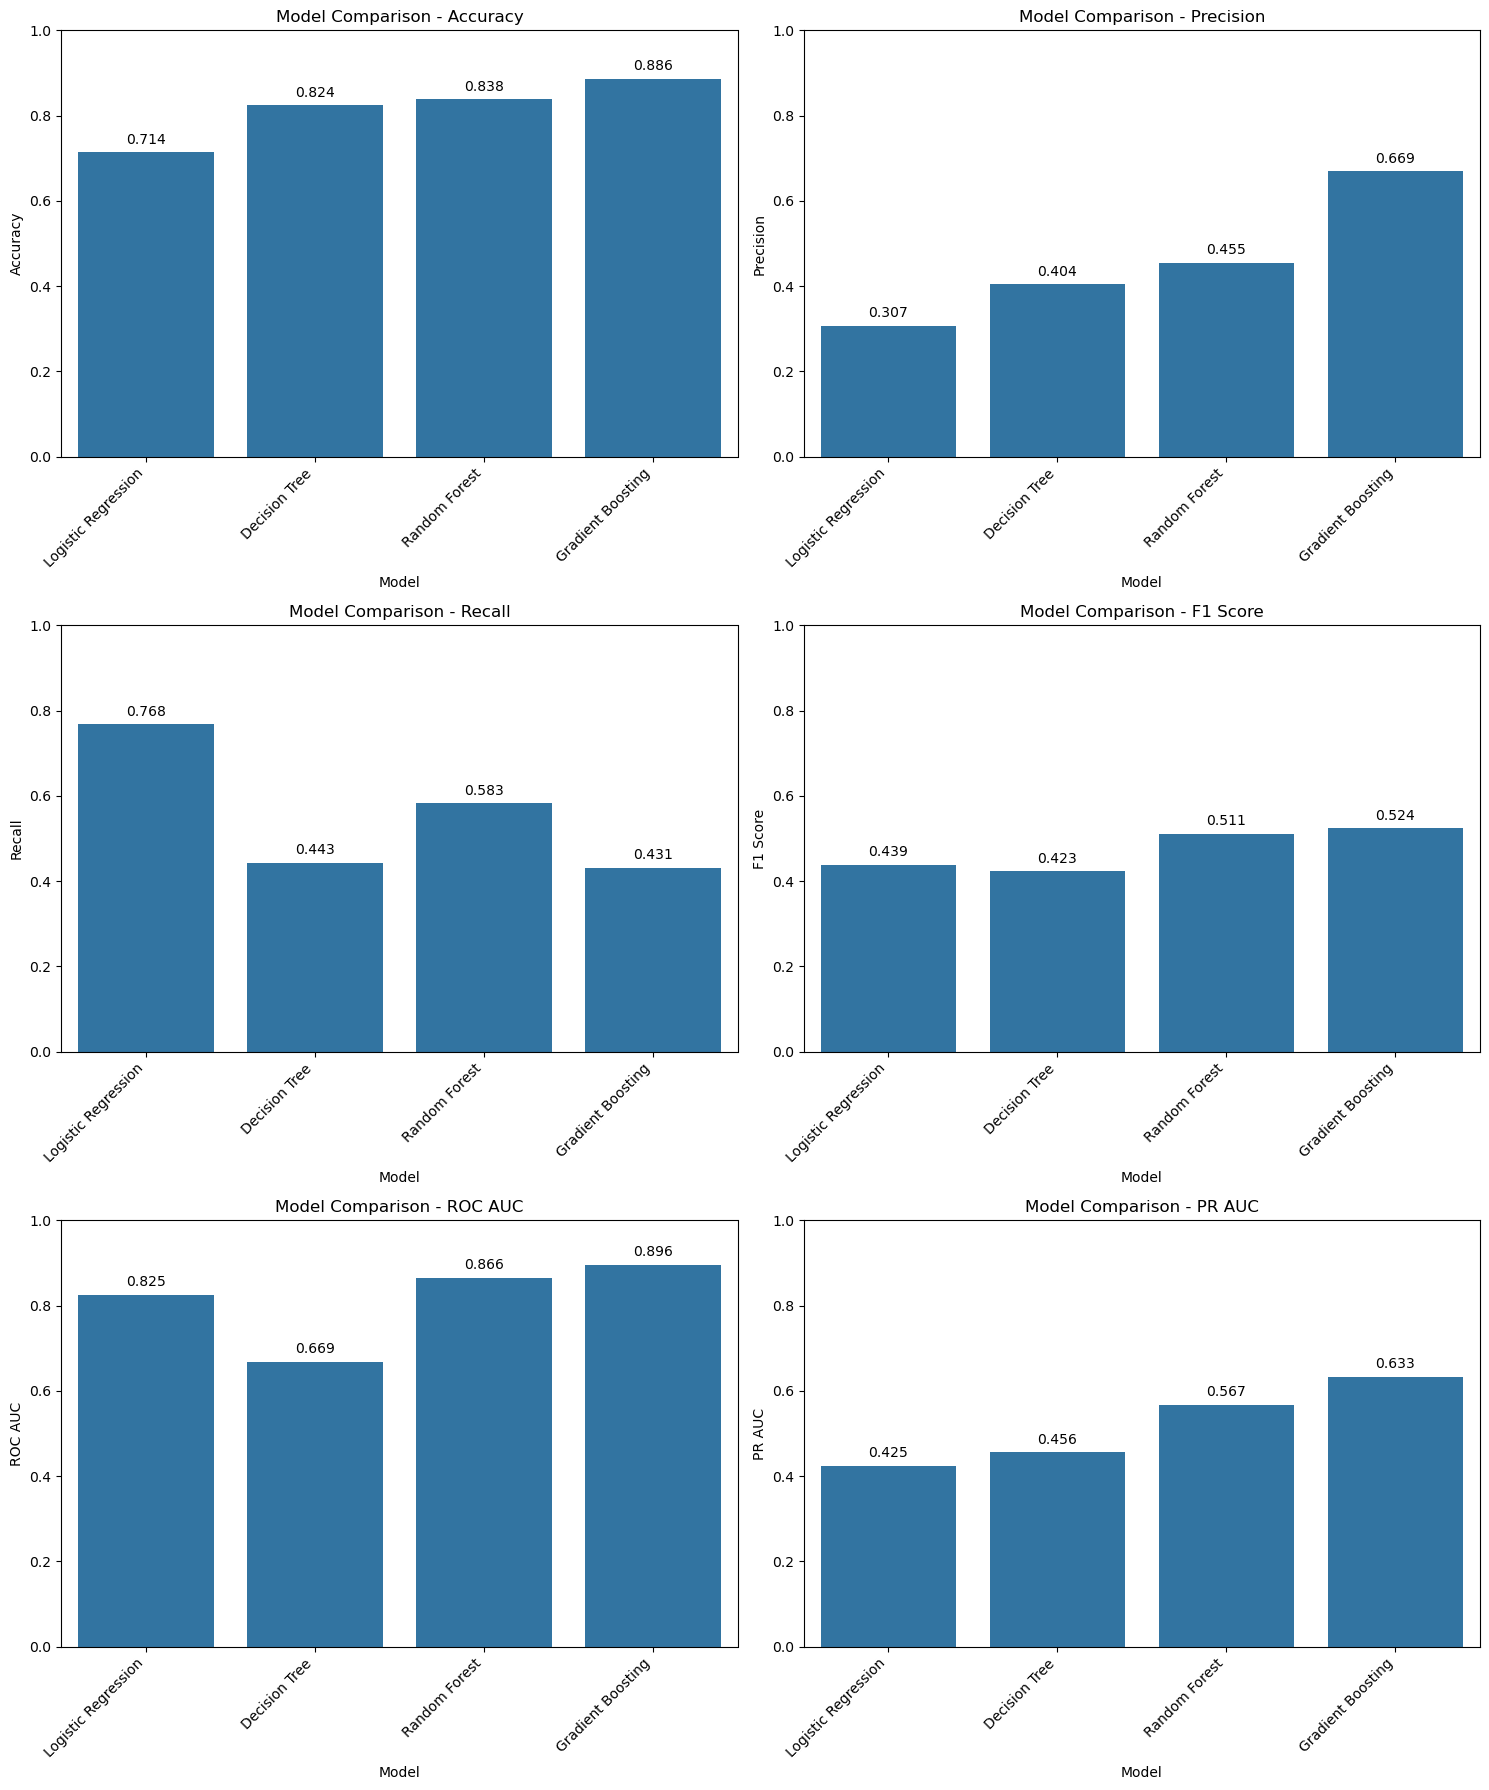


Model Performance Summary:
                     Accuracy  Precision  Recall  F1 Score  ROC AUC  PR AUC
Model                                                                      
Logistic Regression    0.7143     0.3070  0.7680    0.4386   0.8252  0.4248
Decision Tree          0.8240     0.4040  0.4432    0.4227   0.6687  0.4562
Random Forest          0.8380     0.4551  0.5830    0.5112   0.8657  0.5672
Gradient Boosting      0.8863     0.6690  0.4312    0.5244   0.8964  0.6332

=== Selecting Best Model ===
Best model: Gradient Boosting
Best model metrics:
  - accuracy: 0.8863
  - precision: 0.6690
  - recall: 0.4312
  - f1: 0.5244
  - roc_auc: 0.8964
  - pr_auc: 0.6332
  - threshold: 0.4800

=== Saving Best Model ===
Best model saved as 'best_default_model.pkl'
Optimal threshold saved as 'optimal_threshold.pkl'

=== Model Comparison Complete ===
You can now use the best model for predictions using the predict_with_optimal_threshold function


In [ ]:
# Assuming you have your loans_df dataframe already loaded and preprocessed


# 4. Call the main function to compare models
print("\n=== Starting Model Comparison ===")
print("This may take some time depending on your dataset size and computational resources...")
print("Progress will be displayed for each step of the process")

# Time the entire model comparison process
import time
from datetime import timedelta
start_time = time.time()

# Call the model comparison function
models_dict, X_train, X_val, X_test, y_train, y_val, y_test = compare_models_with_progress(X, y)

# Calculate total elapsed time
total_time = time.time() - start_time
print(f"\nTotal model comparison time: {timedelta(seconds=total_time)}")

# 5. Compare all models with visualizations
print("\n=== Model Comparison Visualizations ===")
# Plot precision-recall curves for all models
plot_precision_recall_curves_all(models_dict, X_test, y_test)

# Create comparison bar charts
plot_model_comparison_charts(models_dict)


# 6. Find the best model
print("\n=== Selecting Best Model ===")
# Find the best model based on F1 score
best_model_name = max(models_dict, key=lambda k: models_dict[k]['metrics']['f1'])
best_model = models_dict[best_model_name]['model']
best_threshold = models_dict[best_model_name]['metrics']['threshold']

print(f"Best model: {best_model_name.replace('_', ' ').title()}")
print(f"Best model metrics:")
for metric, value in models_dict[best_model_name]['metrics'].items():
    if metric != 'confusion_matrix':
        print(f"  - {metric}: {value:.4f}")

# 7. Save the best model and threshold for future use
print("\n=== Saving Best Model ===")
import joblib
joblib.dump(best_model, 'best_default_model.pkl')
joblib.dump(best_threshold, 'optimal_threshold.pkl')
print(f"Best model saved as 'best_default_model.pkl'")
print(f"Optimal threshold saved as 'optimal_threshold.pkl'")

# 8. Define prediction function
def predict_with_optimal_threshold(model, threshold, X_new):
    """
    Make predictions on new data using the trained model and optimal threshold.
    
    Parameters:
    -----------
    model : trained model object
        The best model selected from comparison
    threshold : float
        The optimal classification threshold
    X_new : DataFrame
        New data to make predictions on
        
    Returns:
    --------
    predictions : array
        Binary predictions (0 or 1)
    probabilities : array
        Probability scores for the positive class
    """
    print("Preprocessing new data...")
    # Preprocess new data the same way
    X_new = create_enhanced_features(X_new)
    X_new = pd.get_dummies(X_new, columns=categorical_cols, drop_first=True)
    
    # Ensure X_new has the same columns as training data
    missing_cols = set(X.columns) - set(X_new.columns)
    for col in missing_cols:
        X_new[col] = 0
    
    # Ensure columns are in the same order
    X_new = X_new[X.columns]
    
    print(f"Making predictions with threshold {threshold:.2f}...")
    # Predict with optimal threshold
    probabilities = model.predict_proba(X_new)[:, 1]
    predictions = (probabilities >= threshold).astype(int)
    
    print(f"Predictions summary: {pd.Series(predictions).value_counts()}")
    
    return predictions, probabilities

print("\n=== Model Comparison Complete ===")
print("You can now use the best model for predictions using the predict_with_optimal_threshold function")


Creating stacking ensemble with feature selection...
Performing feature selection...
Selected 55 features out of 460
Tuning Random Forest...
Best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Tuning XGBoost...


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:19:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:19:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:19:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [05:19:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

Best XGB params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Creating meta-features through cross-validation...
rf - Test Accuracy: 0.8784, AUC: 0.8858, F1: 0.3873
xgb - Test Accuracy: 0.8896, AUC: 0.9206, F1: 0.5499
Tuning meta-model...
Best meta-model params: {'C': 0.01, 'class_weight': 'balanced', 'solver': 'lbfgs'}

Stacking Ensemble Performance:
Optimal threshold: 0.5217
Accuracy: 0.8706
AUC: 0.9188
Precision: 0.5543
Recall: 0.7391
F1 Score: 0.6335


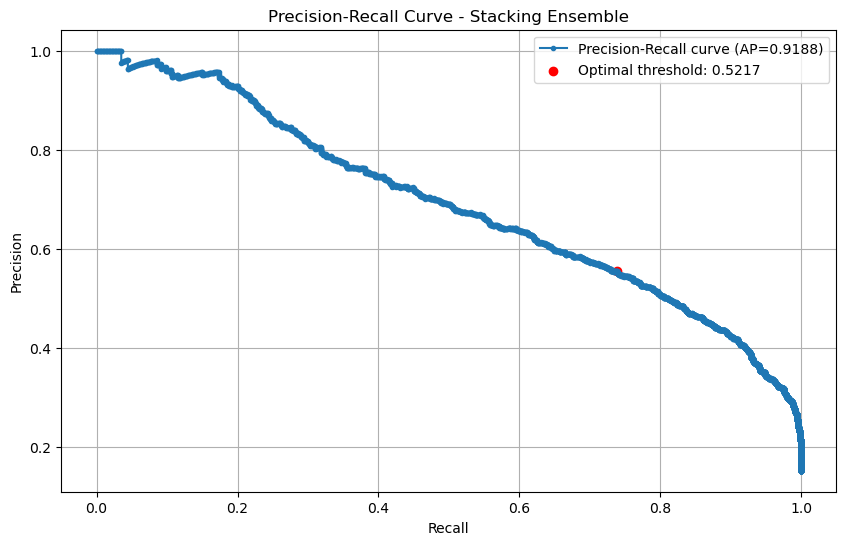

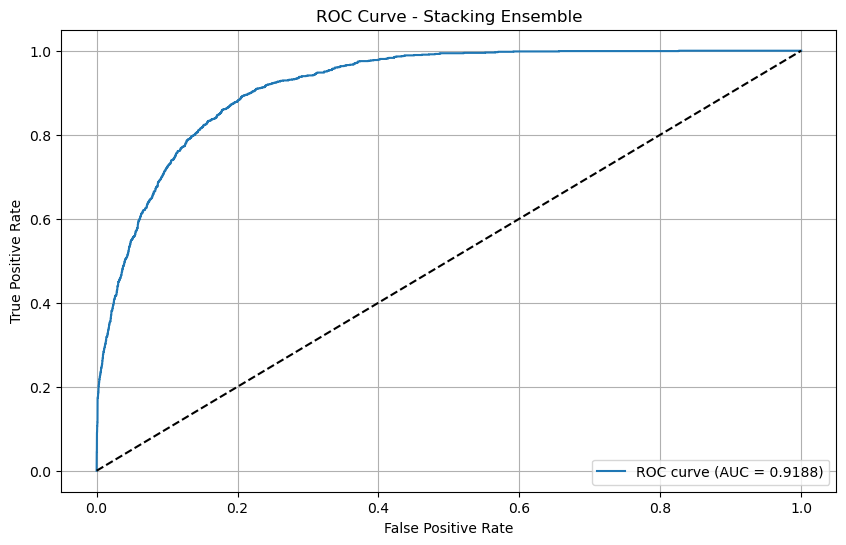

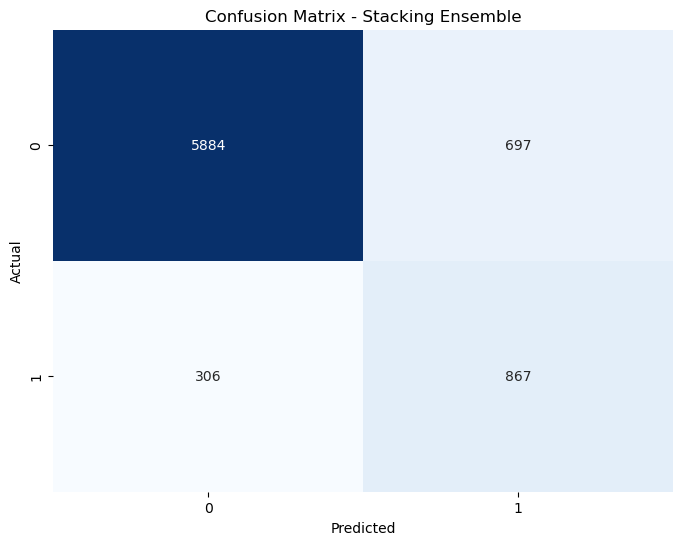


Creating weighted ensemble...
Training rf model...
rf - Validation F1: 0.0996, Test F1: 0.1061
Training xgb model...
xgb - Validation F1: 0.4259, Test F1: 0.4766
Training lr model...
lr - Validation F1: 0.4182, Test F1: 0.4383
Normalized weights: {'rf': 0.1055366080859997, 'xgb': 0.45129820375799673, 'lr': 0.44316518815600353}

Weighted Ensemble Performance:
Optimal threshold: 0.4066
Accuracy: 0.8458
AUC: 0.8928
Precision: 0.4931
Recall: 0.6999
F1 Score: 0.5786


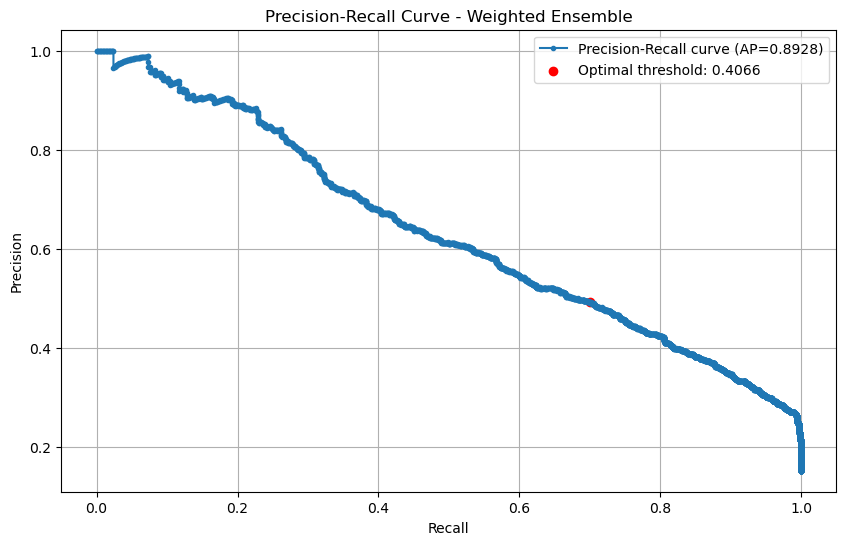

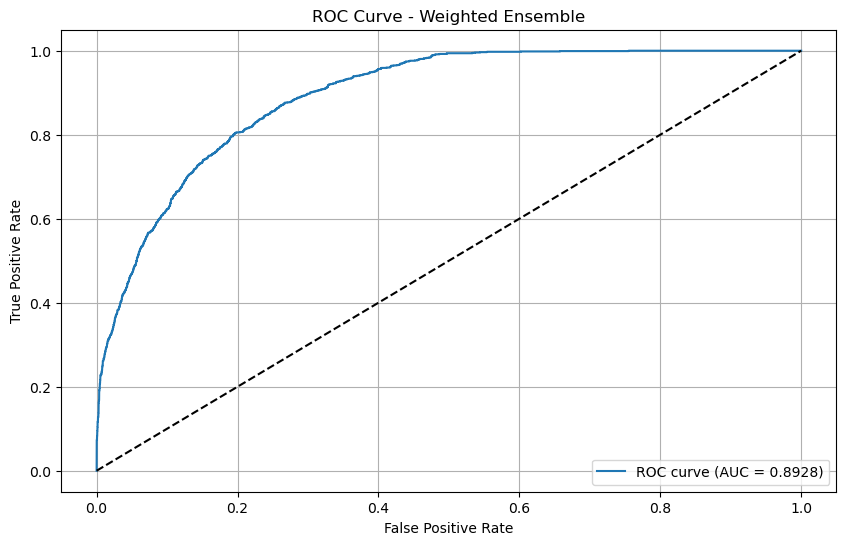

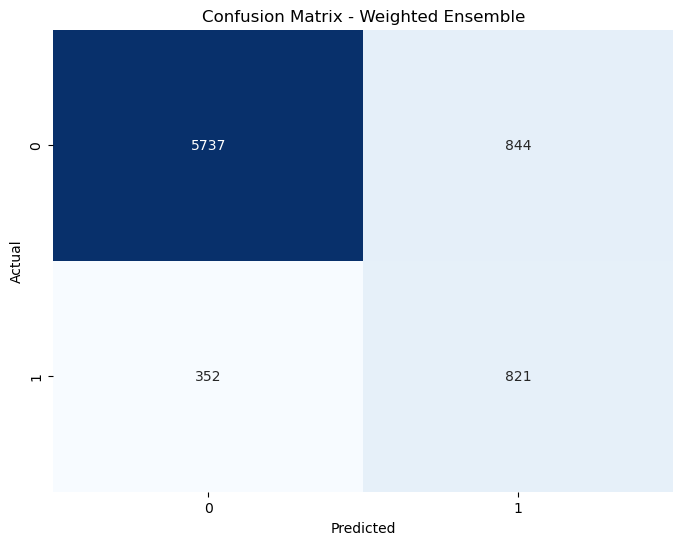


=== Ensemble Methods Comparison ===


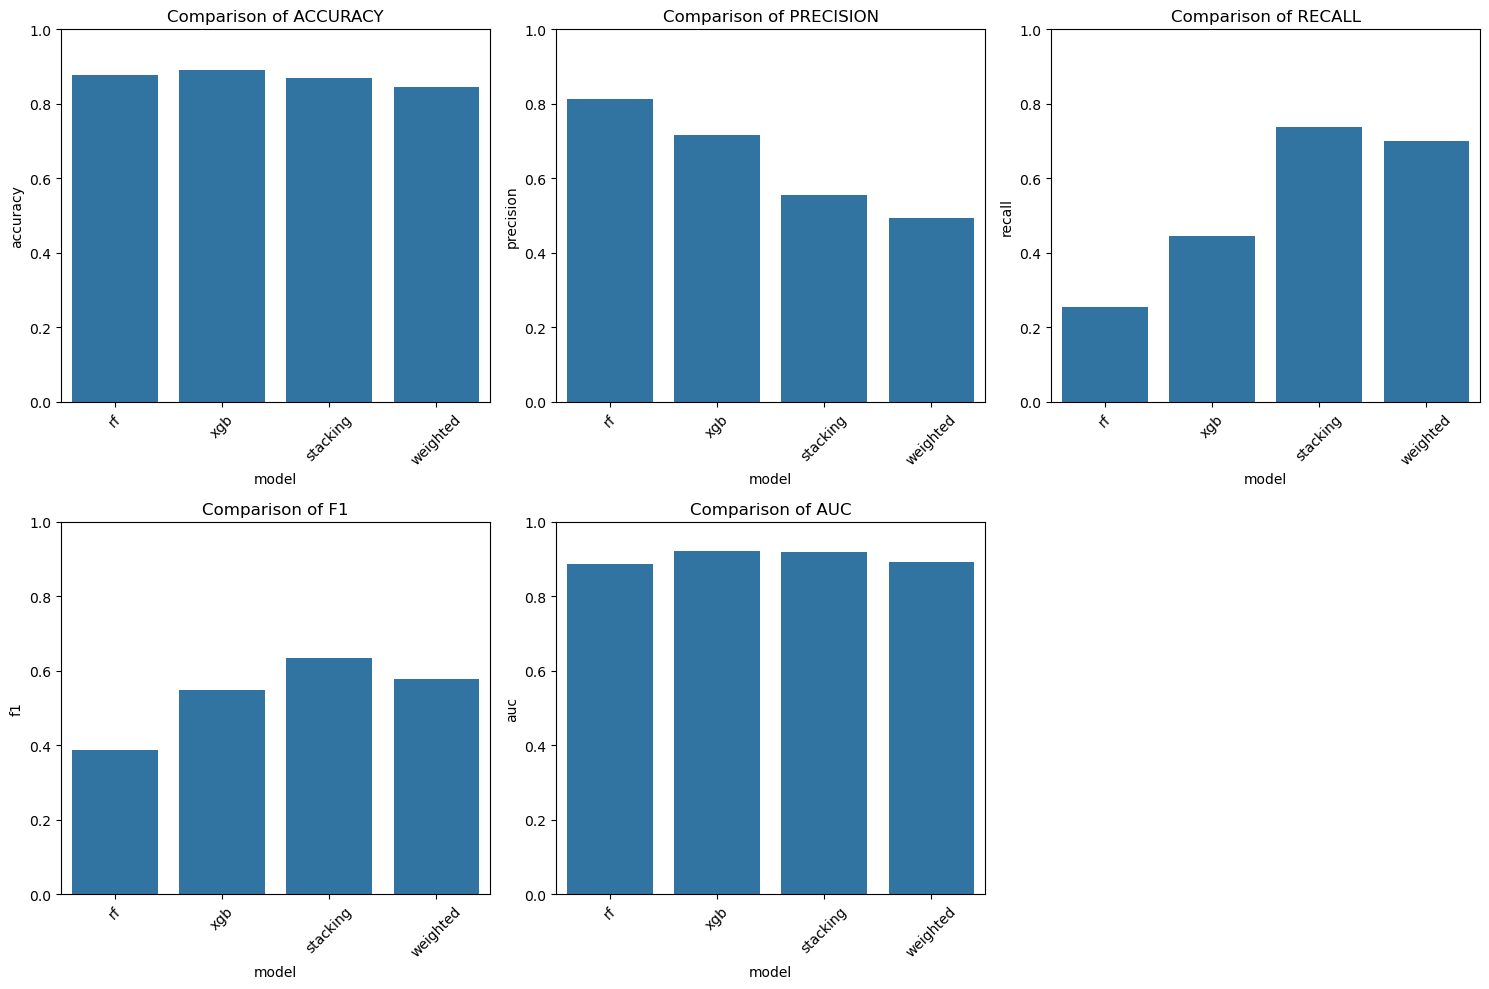

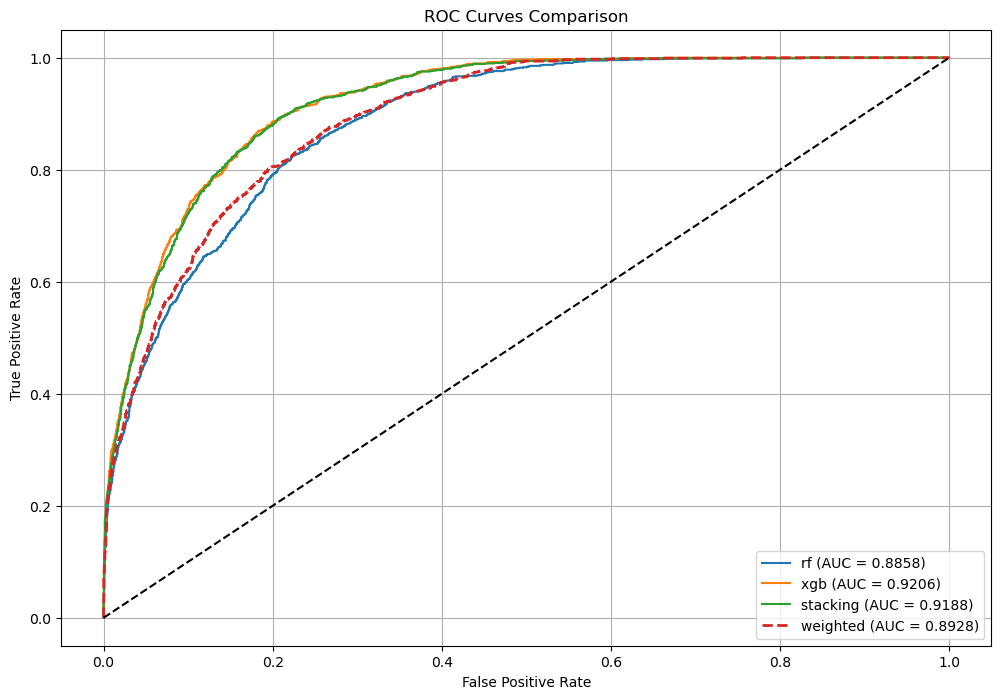

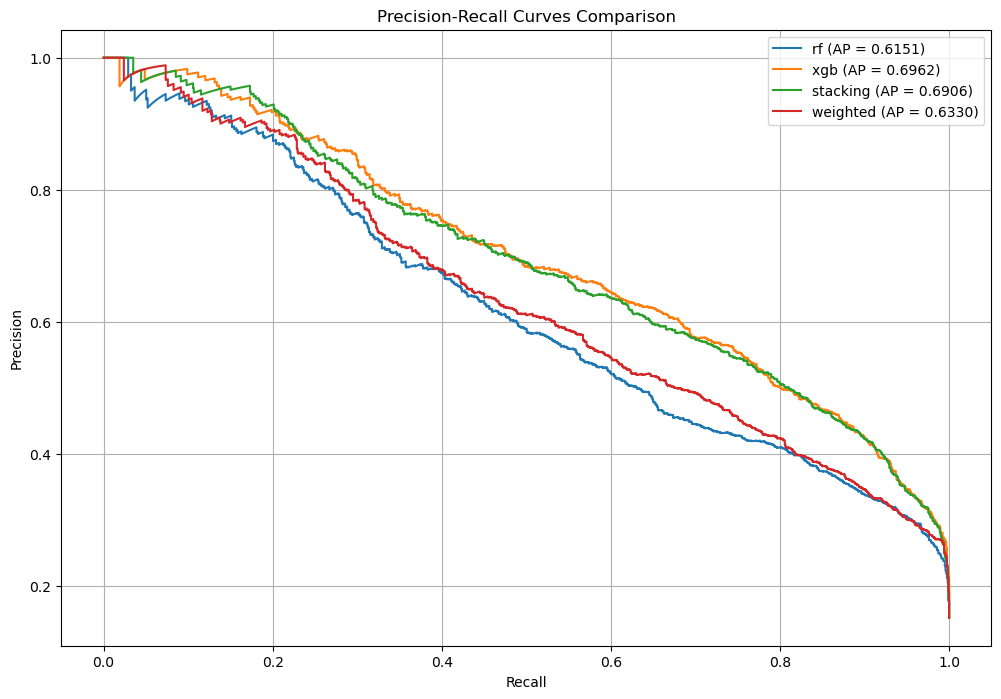


=== Performance Summary ===
   model  accuracy  precision   recall       f1      auc
      rf  0.878385   0.814208 0.254049 0.387264 0.885782
     xgb  0.889605   0.717421 0.445865 0.549947 0.920571
stacking  0.870647   0.554348 0.739130 0.633540 0.918812
weighted  0.845757   0.493093 0.699915 0.578576 0.892831

=== Best Models ===
Best accuracy: xgb (0.8896)
Best precision: rf (0.8142)
Best recall: stacking (0.7391)
Best f1: stacking (0.6335)
Best auc: xgb (0.9206)


In [14]:
# Define a function to create our stacking ensemble with feature selection
def create_stacking_ensemble_with_feature_selection(X_train, y_train, X_test, y_test):
    # Feature selection using Random Forest importance
    print("Performing feature selection...")
    feature_selector = SelectFromModel(
        RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    )
    feature_selector.fit(X_train, y_train)
    
    # Transform data with selected features
    X_train_selected = feature_selector.transform(X_train)
    X_test_selected = feature_selector.transform(X_test)
    
    print(f"Selected {X_train_selected.shape[1]} features out of {X_train.shape[1]}")
    
    # Convert to numpy arrays to avoid feature name issues
    X_train_selected = np.array(X_train_selected)
    X_test_selected = np.array(X_test_selected)
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_selected = imputer.fit_transform(X_train_selected)
    X_test_selected = imputer.transform(X_test_selected)
    
    # Define base models with hyperparameter tuning
    base_models = []
    
    # Random Forest
    print("Tuning Random Forest...")
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    rf = GridSearchCV(
        RandomForestClassifier(random_state=42, n_jobs=-1),
        rf_params, cv=3, scoring='f1', n_jobs=-1
    )
    rf.fit(X_train_selected, y_train)
    base_models.append(('rf', rf.best_estimator_))
    print(f"Best RF params: {rf.best_params_}")
    
    # XGBoost
    print("Tuning XGBoost...")
    xgb_params = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    xgb_model = GridSearchCV(
        xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
        xgb_params, cv=3, scoring='f1', n_jobs=-1
    )
    xgb_model.fit(X_train_selected, y_train)
    base_models.append(('xgb', xgb_model.best_estimator_))
    print(f"Best XGB params: {xgb_model.best_params_}")
    
    # Create meta-features through cross-validation
    print("Creating meta-features through cross-validation...")
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    meta_features_train = np.zeros((X_train_selected.shape[0], len(base_models)))
    meta_features_test = np.zeros((X_test_selected.shape[0], len(base_models)))
    
    model_metrics = {}
    
    for i, (name, model) in enumerate(base_models):
        # Generate out-of-fold predictions for training data
        meta_features_train[:, i] = cross_val_predict(
            model, X_train_selected, y_train, cv=kf, method='predict_proba'
        )[:, 1]
        
        # Train on full training data and predict on test set
        model.fit(X_train_selected, y_train)
        test_probs = model.predict_proba(X_test_selected)[:, 1]
        meta_features_test[:, i] = test_probs
        
        # Print base model performance
        y_pred = model.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, test_probs)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        model_metrics[name] = {
            'accuracy': acc,
            'auc': auc_score,
            'precision': prec,
            'recall': rec,
            'f1': f1,
            'probabilities': test_probs
        }
        
        print(f"{name} - Test Accuracy: {acc:.4f}, AUC: {auc_score:.4f}, F1: {f1:.4f}")
    
    # Meta-model with hyperparameter tuning
    print("Tuning meta-model...")
    meta_params = {
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear', 'lbfgs'],
        'class_weight': [None, 'balanced']
    }
    meta_model = GridSearchCV(
        LogisticRegression(random_state=42, max_iter=1000),
        meta_params, cv=3, scoring='f1'
    )
    meta_model.fit(meta_features_train, y_train)
    print(f"Best meta-model params: {meta_model.best_params_}")
    
    # Make predictions with the meta-model
    meta_probs = meta_model.predict_proba(meta_features_test)[:, 1]
    
    # Find optimal threshold using precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, meta_probs)
    
    # Calculate F1 score for each threshold
    f1_scores = []
    for p, r in zip(precision, recall):
        if p + r == 0:  # Avoid division by zero
            f1 = 0
        else:
            f1 = 2 * (p * r) / (p + r)
        f1_scores.append(f1)
    
    # Find threshold that maximizes F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    # Make predictions with optimal threshold
    meta_preds = (meta_probs >= optimal_threshold).astype(int)
    
    # Evaluate the stacking ensemble
    acc = accuracy_score(y_test, meta_preds)
    auc_score = roc_auc_score(y_test, meta_probs)
    prec = precision_score(y_test, meta_preds)
    rec = recall_score(y_test, meta_preds)
    f1 = f1_score(y_test, meta_preds)
    
    model_metrics['stacking'] = {
        'accuracy': acc,
        'auc': auc_score,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'probabilities': meta_probs,
        'threshold': optimal_threshold
    }
    
    print("\nStacking Ensemble Performance:")
    print(f"Optimal threshold: {optimal_threshold:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP={auc_score:.4f})')
    plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', 
               label=f'Optimal threshold: {optimal_threshold:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Stacking Ensemble')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, meta_probs)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Stacking Ensemble')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, meta_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Stacking Ensemble')
    plt.show()
    
    return meta_model, feature_selector, base_models, model_metrics

# Implement weighted ensemble as an alternative approach
def create_weighted_ensemble(X_train, y_train, X_test, y_test):
    # Split training data for model evaluation
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train, y_train, test_size=test_size_percent, random_state=42
    )
    
    # Convert to numpy arrays to avoid feature name issues
    X_train_sub = np.array(X_train_sub)
    X_val = np.array(X_val)
    X_test = np.array(X_test)
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_sub = imputer.fit_transform(X_train_sub)
    X_val = imputer.transform(X_val)
    X_test = imputer.transform(X_test)
    
    # Define base models
    models = {
        'rf': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42, n_jobs=-1),
        'xgb': xgb.XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='logloss'),
        'lr': LogisticRegression(C=1.0, max_iter=1000, solver='liblinear', class_weight='balanced', random_state=42)
    }
    
    # Train models and calculate weights based on F1 scores
    weights = {}
    predictions = {}
    model_metrics = {}
    
    for name, model in models.items():
        print(f"Training {name} model...")
        # Train the model
        model.fit(X_train_sub, y_train_sub)
        
        # Calculate F1 on validation set
        val_preds = model.predict(X_val)
        val_probs = model.predict_proba(X_val)[:, 1]
        f1 = f1_score(y_val, val_preds)
        weights[name] = f1
        
        # Store predictions on test set
        test_probs = model.predict_proba(X_test)[:, 1]
        predictions[name] = test_probs
        
        # Get test metrics
        test_preds = model.predict(X_test)
        acc = accuracy_score(y_test, test_preds)
        auc_score = roc_auc_score(y_test, test_probs)
        prec = precision_score(y_test, test_preds)
        rec = recall_score(y_test, test_preds)
        test_f1 = f1_score(y_test, test_preds)
        
        model_metrics[name] = {
            'accuracy': acc,
            'auc': auc_score,
            'precision': prec,
            'recall': rec,
            'f1': test_f1,
            'probabilities': test_probs
        }
        
        print(f"{name} - Validation F1: {f1:.4f}, Test F1: {test_f1:.4f}")
    
    # Normalize weights to sum to 1
    total_weight = sum(weights.values())
    for name in weights:
        weights[name] /= total_weight
    
    print(f"Normalized weights: {weights}")
    
    # Combine predictions using weights
    weighted_probs = np.zeros(len(y_test))
    for name, probs in predictions.items():
        weighted_probs += weights[name] * probs
    
    # Find optimal threshold using precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, weighted_probs)
    
    # Calculate F1 score for each threshold
    f1_scores = []
    for p, r in zip(precision, recall):
        if p + r == 0:  # Avoid division by zero
            f1 = 0
        else:
            f1 = 2 * (p * r) / (p + r)
        f1_scores.append(f1)
    
    # Find threshold that maximizes F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    # Make predictions with optimal threshold
    weighted_preds = (weighted_probs >= optimal_threshold).astype(int)
    
    # Evaluate the weighted ensemble
    acc = accuracy_score(y_test, weighted_preds)
    auc_score = roc_auc_score(y_test, weighted_probs)
    prec = precision_score(y_test, weighted_preds)
    rec = recall_score(y_test, weighted_preds)
    f1 = f1_score(y_test, weighted_preds)
    
    model_metrics['weighted'] = {
        'accuracy': acc,
        'auc': auc_score,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'probabilities': weighted_probs,
        'threshold': optimal_threshold
    }
    
    print("\nWeighted Ensemble Performance:")
    print(f"Optimal threshold: {optimal_threshold:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc_score:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot precision-recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP={auc_score:.4f})')
    plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', 
               label=f'Optimal threshold: {optimal_threshold:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Weighted Ensemble')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, weighted_probs)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Weighted Ensemble')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, weighted_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Weighted Ensemble')
    plt.show()
    
    return weights, models, model_metrics
# Function to compare model performance with visualizations
def compare_models(stacking_metrics, weighted_metrics):
    # Prepare data for comparison
    models = list(stacking_metrics.keys()) + ['weighted']
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    
    # Combine metrics
    all_metrics = {**stacking_metrics}
    all_metrics['weighted'] = weighted_metrics['weighted']
    
    # Create DataFrame for visualization
    data = []
    for model in all_metrics:
        row = {'model': model}
        for metric in metrics:
            row[metric] = all_metrics[model][metric]
        data.append(row)
    
    df = pd.DataFrame(data)
    
    # Plot comparison bar charts
    plt.figure(figsize=(15, 10))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 3, i)
        sns.barplot(x='model', y=metric, data=df)
        plt.title(f'Comparison of {metric.upper()}')
        plt.xticks(rotation=45)
        plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()
    
    # Plot ROC curves for all models
    plt.figure(figsize=(12, 8))
    
    for model in all_metrics:
        if model != 'weighted':  # Skip weighted in this loop
            fpr, tpr, _ = roc_curve(y_test, all_metrics[model]['probabilities'])
            plt.plot(fpr, tpr, label=f'{model} (AUC = {all_metrics[model]["auc"]:.4f})')
    
    # Add weighted model ROC curve
    fpr, tpr, _ = roc_curve(y_test, all_metrics['weighted']['probabilities'])
    plt.plot(fpr, tpr, label=f'weighted (AUC = {all_metrics["weighted"]["auc"]:.4f})', linestyle='--', linewidth=2)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
    
    # Plot precision-recall curves
    plt.figure(figsize=(12, 8))
    
    for model in all_metrics:
        precision, recall, _ = precision_recall_curve(y_test, all_metrics[model]['probabilities'])
        avg_precision = average_precision_score(y_test, all_metrics[model]['probabilities'])
        plt.plot(recall, precision, label=f'{model} (AP = {avg_precision:.4f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    # Print summary table
    print("\n=== Performance Summary ===")
    print(df.to_string(index=False))
    
    # Identify best model for each metric
    best_models = {}
    for metric in metrics:
        best_model = df.loc[df[metric].idxmax()]['model']
        best_value = df[metric].max()
        best_models[metric] = (best_model, best_value)
    
    print("\n=== Best Models ===")
    for metric, (model, value) in best_models.items():
        print(f"Best {metric}: {model} ({value:.4f})")


# Usage example (assuming X_train, X_test, y_train, y_test are already prepared)
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_percent, random_state=42)
# 1. Create stacking ensemble with feature selection
print("Creating stacking ensemble with feature selection...")
stacking_model, feature_selector, base_models, stacking_metrics = create_stacking_ensemble_with_feature_selection(X_train, y_train, X_test, y_test)

# 2. Create weighted ensemble as an alternative
print("\nCreating weighted ensemble...")
# Current code:
weights, weighted_models, weighted_metrics = create_weighted_ensemble(X_train, y_train, X_test, y_test)
# Compare both ensemble methods
print("\n=== Ensemble Methods Comparison ===")
compare_models(stacking_metrics, weighted_metrics)


---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.